## **Mini Project :** Bigmart Sales Dataset





# **Contents** :
## 1. Introduction
## 2. Data Id
## 3. Libraries
## 4. File path
## 5. Preprocessing and Data Analysis
## 6. Machine learning models
## 7. Conclusion
# **Dataset Information**
The data scientists at BigMart have collected 2020 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sale.


| Variables                         | Description                                                    |
|------------------                   |----------------------------------------------------------------|
| `Item_Identifier`                   | Unique product ID                                              |
| `Item_Weight`                       | Weight of product                                              |
| `Item_Fat_Content`                  | Checks the Concentration of fat in the product                 |
| `Item_Visibility`                   | The % of total display area of all similar products in a store |
| `Item_Type`                         | Product Category                                               |
| `Item_MRP`                          | Maximum Retail Price for a Product                             |
| `Outlet_Identifier`                 | Store ID                                                       |
| `Outlet_Establishment_Year`         | The year in which store was established                        |
| `Outlet_Size`                       | The size of the store (Area Size Category)                     |
| `Outlet_Location_Type`              | In Terms of city Tiers (Size)                                  |
| `Outlet_Type`                       | Grocery store or a type of    supermarket                      |
| `Item_Outlet_Sales`                 | Sales of the product In the Specific outlet                    |



### IMPORTING REQUIRED PYTHON LIBRARIES.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


### Loading the dataset

1. Import the google drive and load the saved dataset to google colab. 
2. Read the .csv file by creating path to pandas. 



In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/data/Train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/data/Test.csv')

**Analysing the dataset**

In [ ]:
train_df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test_df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
train_df.shape


(8523, 12)

In [ ]:
test_df.shape

(5681, 11)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
test_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [ ]:
train_df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**DEALING WITH NULL VALUES**

*   Item_Weight is numerical column so we fill it with Mean Imputation.
*   Outlet_Size is catagorical column so we fill it with Mode Imputation.



In [ ]:
train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode()[0],inplace=True)
test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].mode()[0],inplace=True)

In [ ]:
train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean(),inplace=True)
test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean(),inplace=True)


In [ ]:
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### **Selecting features based on general requirements**

In [ ]:
#train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
#test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [ ]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
train_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
test_df['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [ ]:
train_df['Outlet_Age'], test_df['Outlet_Age']= train_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), test_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)


In [ ]:
train_df['Outlet_Age'].head

<bound method NDFrame.head of 0       21
1       11
2       21
3       22
4       33
        ..
8518    33
8519    18
8520    16
8521    11
8522    23
Name: Outlet_Age, Length: 8523, dtype: int64>

In [ ]:
test_df['Outlet_Age'].head

<bound method NDFrame.head of 0       21
1       13
2       22
3       13
4       35
        ..
5676    23
5677    11
5678    18
5679    13
5680    18
Name: Outlet_Age, Length: 5681, dtype: int64>

### Data visualisation....

<ipython-input-49-2298931559d6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Item_Weight'])


<Axes: xlabel='Item_Weight', ylabel='Density'>

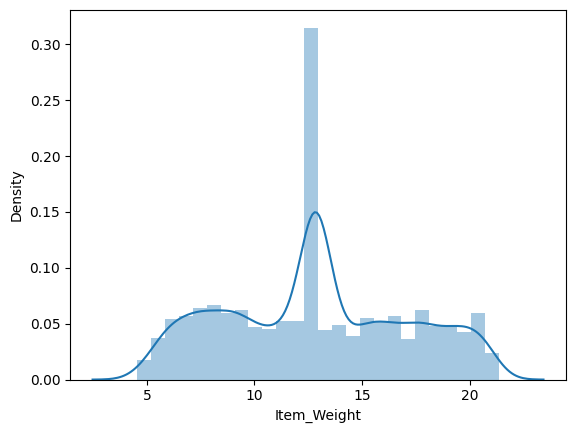

In [ ]:
sns.distplot(train_df['Item_Weight'])

<ipython-input-51-7b2348282936>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Item_Visibility'])


<Axes: xlabel='Item_Visibility', ylabel='Density'>

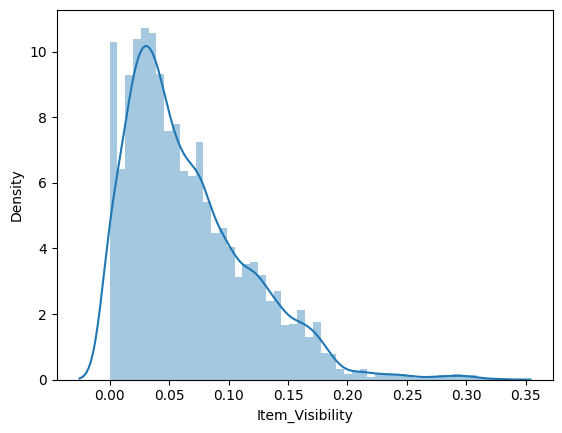

In [ ]:
sns.distplot(train_df['Item_Visibility'])

<ipython-input-53-4a6f3b448ec3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Item_MRP'])


<Axes: xlabel='Item_MRP', ylabel='Density'>

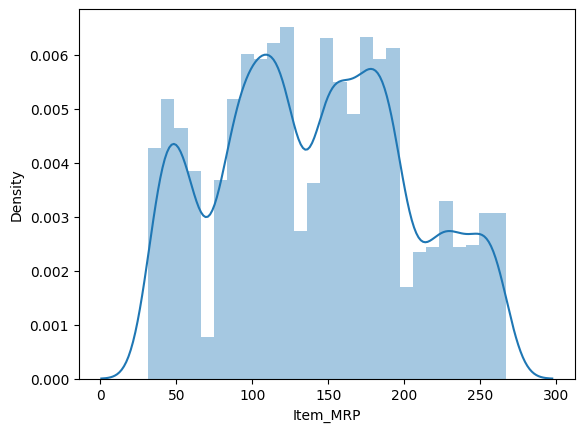

In [ ]:
sns.distplot(train_df['Item_MRP'])

<ipython-input-54-03aa3de0399f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

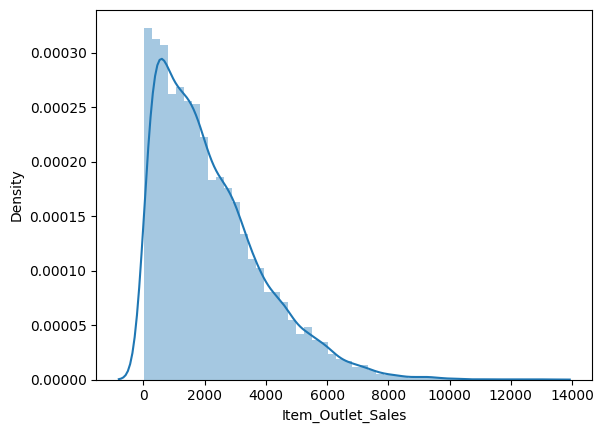

In [ ]:
sns.distplot(train_df['Item_Outlet_Sales'])

### *⚫Installing klib library and importing klib*

In [ ]:
!pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import klib

## Exploratory Data Analysis(EDA) 


###     --By using klib.



GridSpec(6, 5)

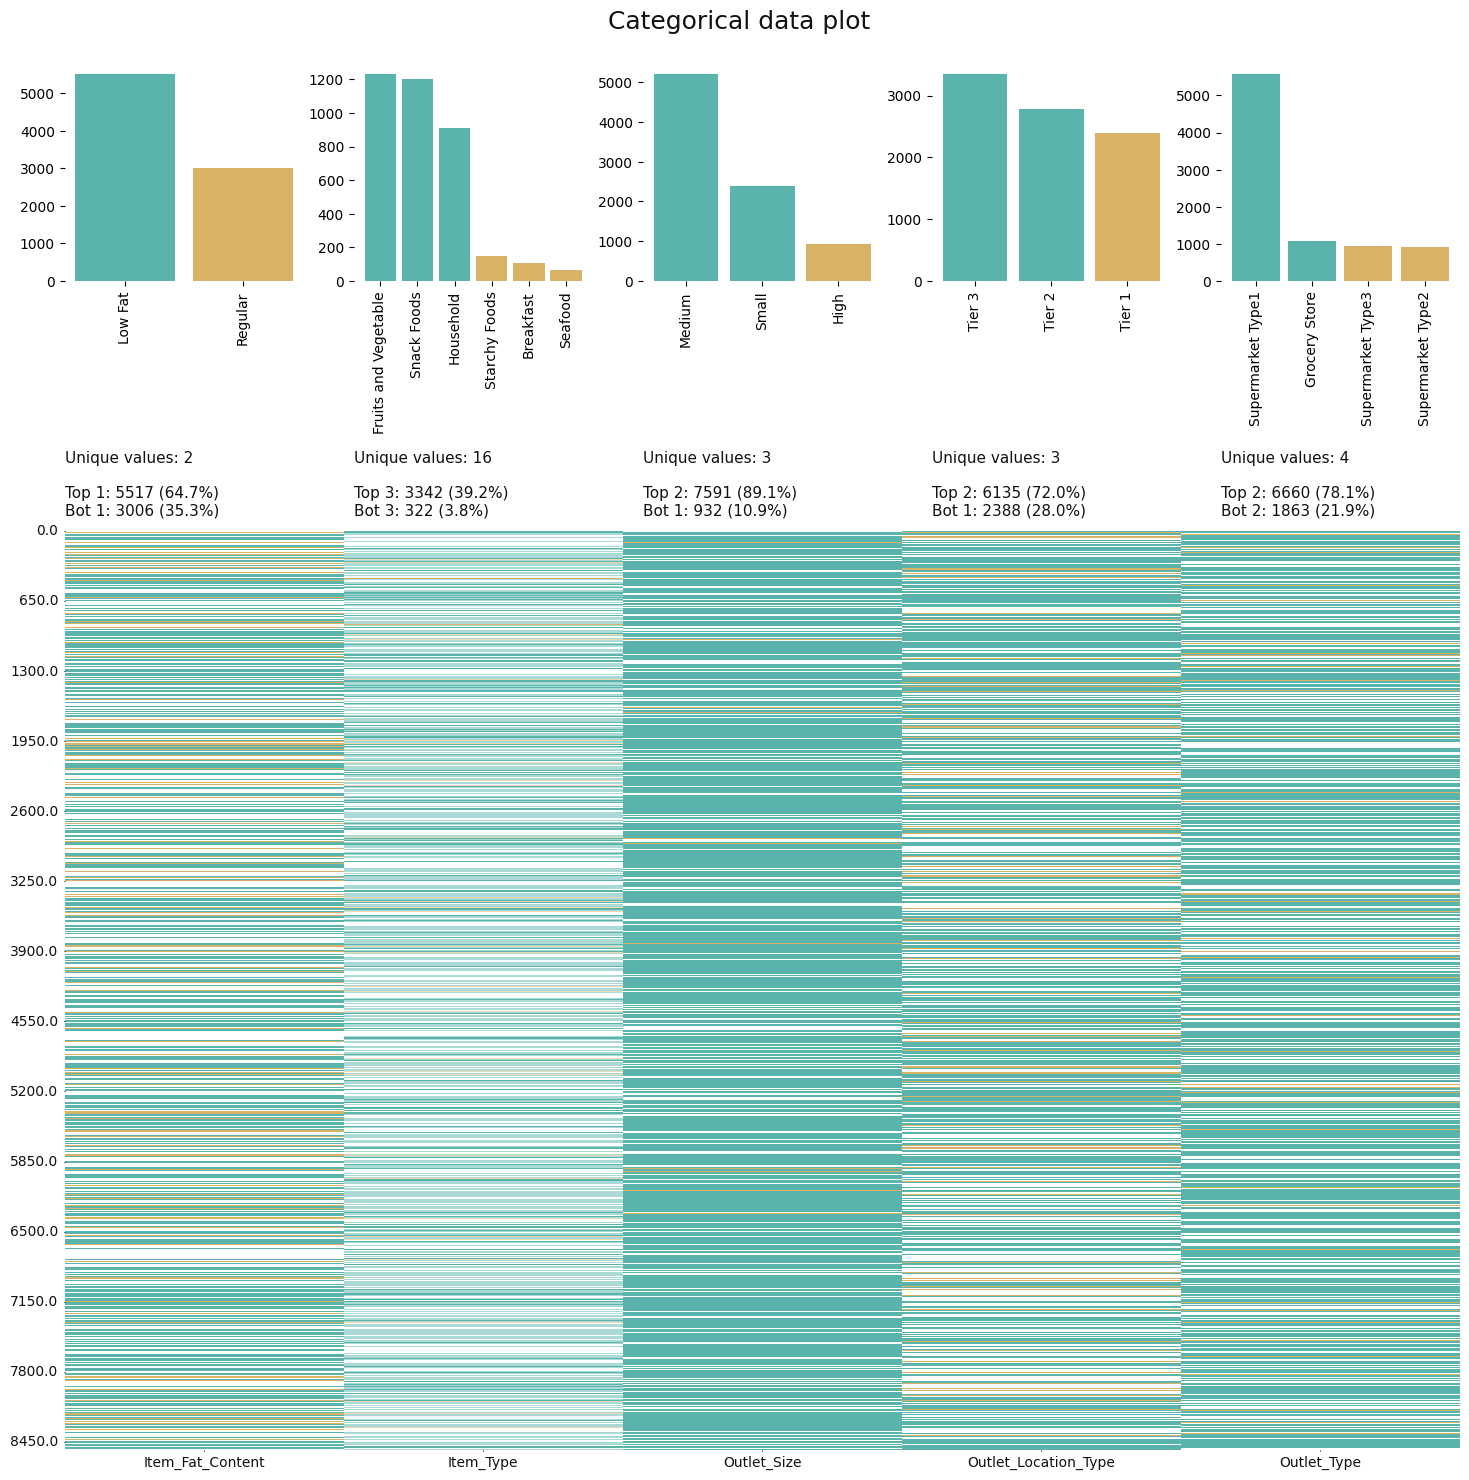

In [ ]:
klib.cat_plot(train_df)

In [ ]:
klib.corr_mat(train_df)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
Item_Weight,1.00,-0.01,0.02,-0.01,0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13,0.07
Item_MRP,0.02,-0.00,1.00,0.01,0.57,-0.01
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05,-1.00
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00,0.05
Outlet_Age,0.01,0.07,-0.01,-1.00,0.05,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

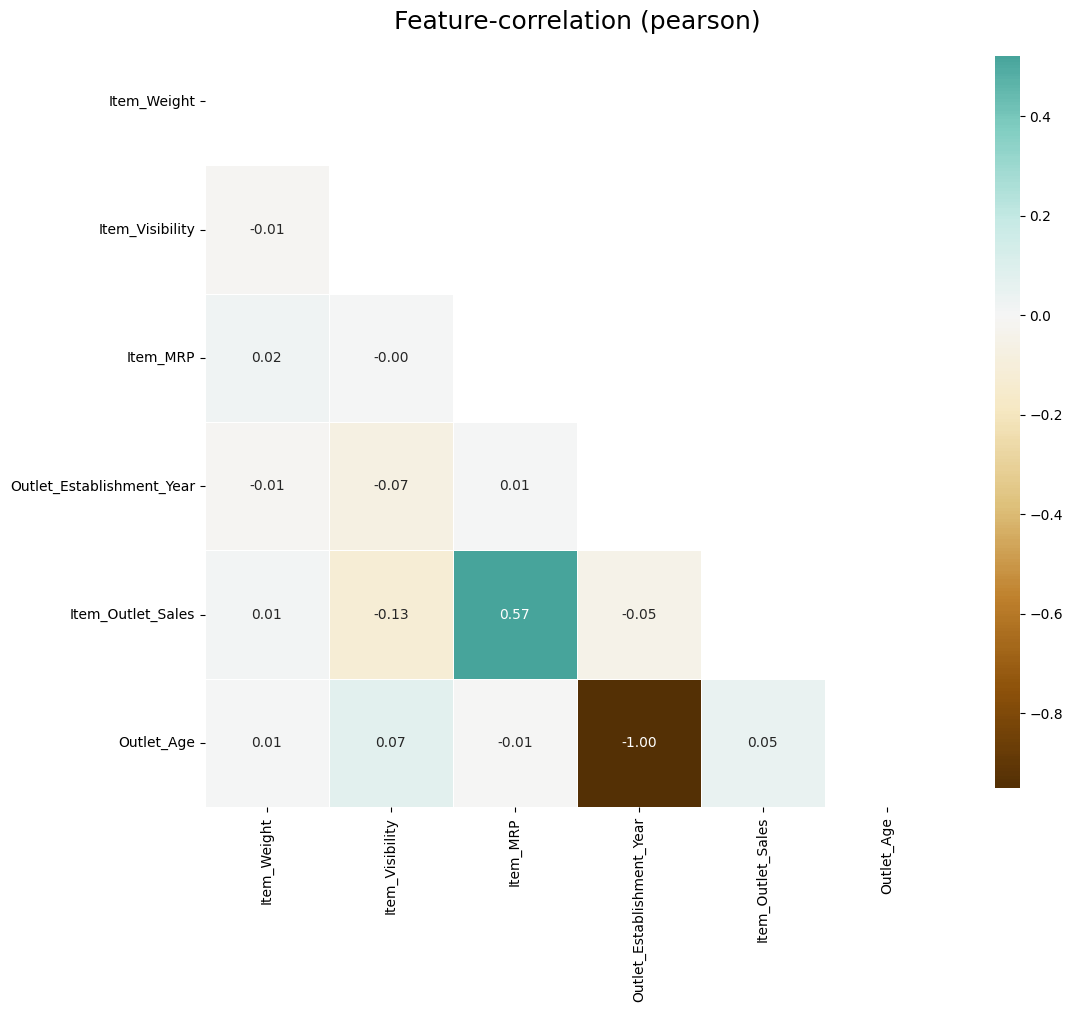

In [ ]:
klib.corr_plot(train_df)

<Axes: xlabel='Outlet_Age', ylabel='Density'>

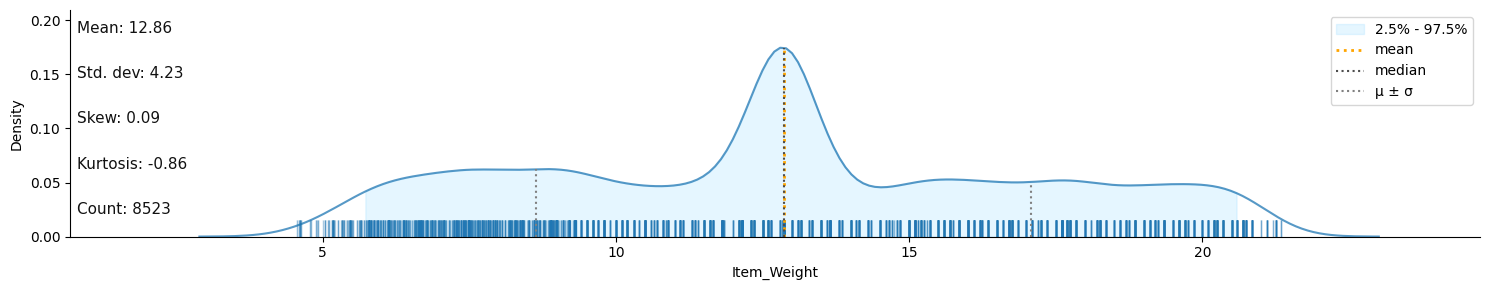

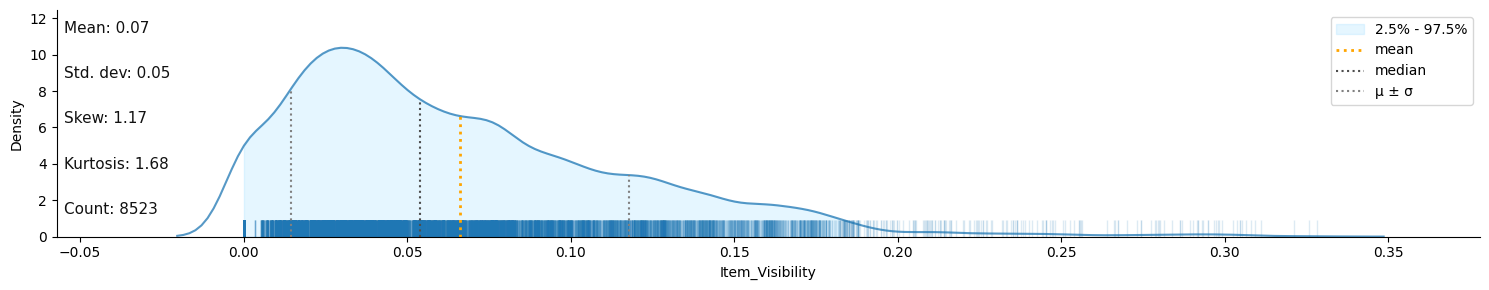

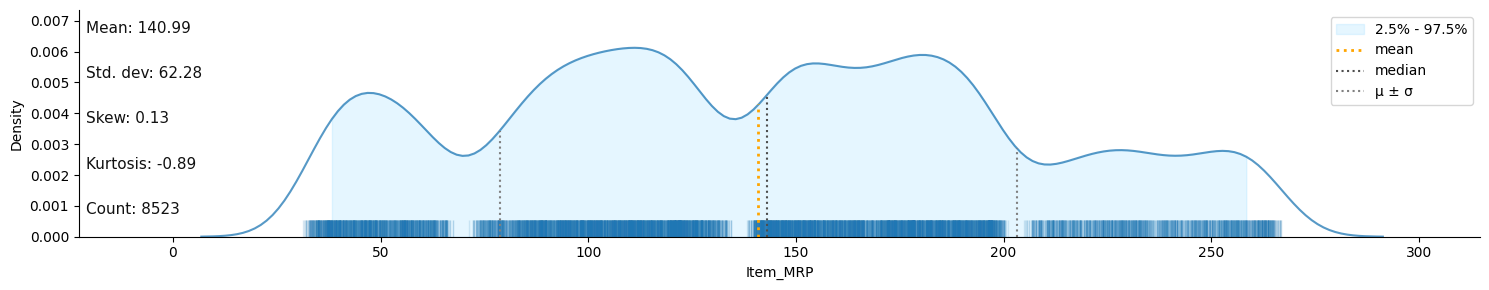

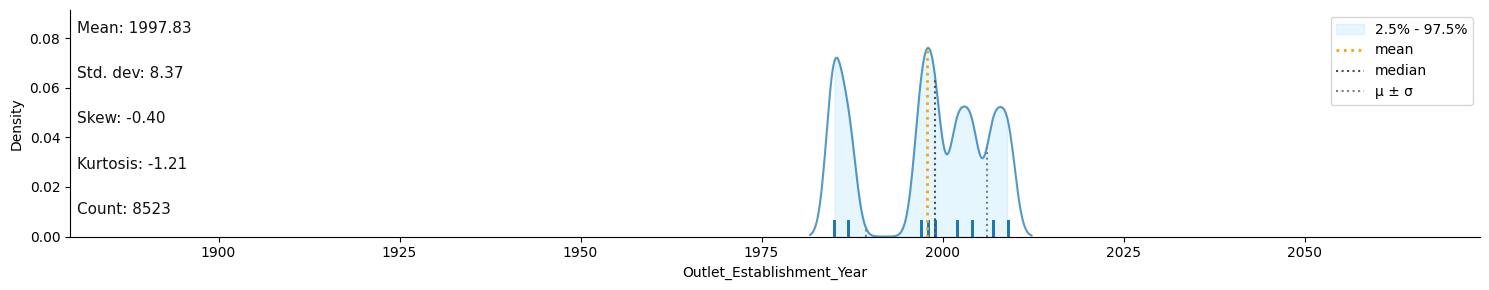

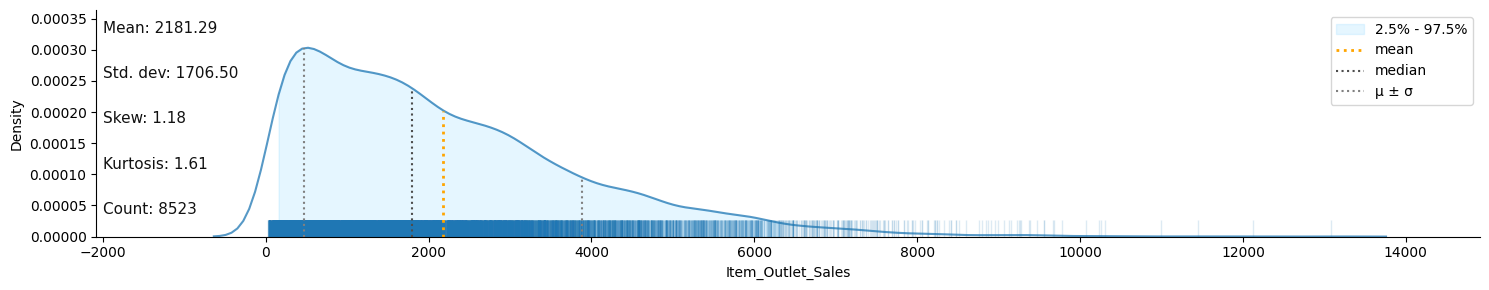

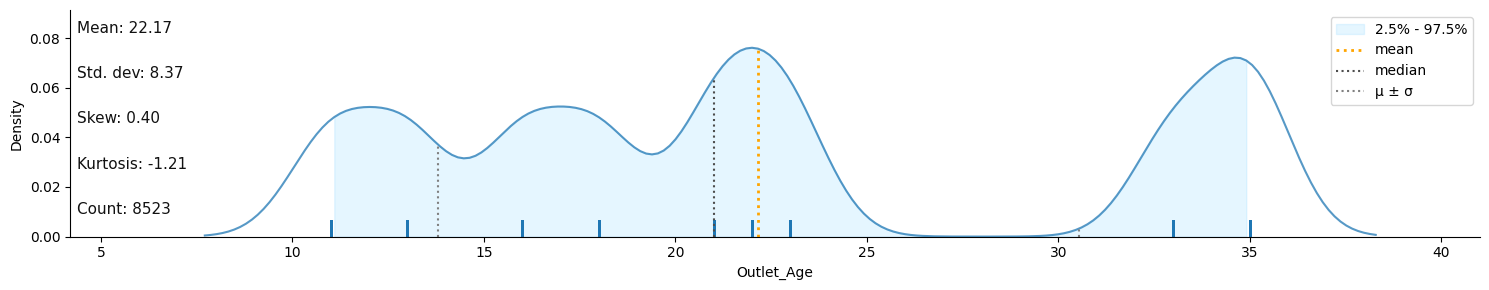

In [ ]:
klib.dist_plot(train_df)

In [ ]:
klib.missingval_plot(train_df) 

No missing values found in the dataset.


### Data Cleaning using Klib Library 

In [ ]:
# klib.clean - functions for cleaning datasets
klib.data_cleaning(train_df)

Shape of cleaned data: (8523, 11) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.52 MB (-72.22%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,outlet_age
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939,21
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791,11
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020,21
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005,22
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200,33
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301,33
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973,18
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647,16
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656,11


In [ ]:
klib.clean_column_names(train_df) # cleans and standardizes column names, also called inside data_cleaning()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,outlet_age
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,33
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834,33
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850,18
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136,16
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976,11


In [ ]:
train_df=klib.convert_datatypes(train_df) # converts existing to more efficient dtypes, also called inside data_cleaning()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8523 non-null   float32 
 1   item_fat_content           8523 non-null   category
 2   item_visibility            8523 non-null   float32 
 3   item_type                  8523 non-null   category
 4   item_mrp                   8523 non-null   float32 
 5   outlet_establishment_year  8523 non-null   int16   
 6   outlet_size                8523 non-null   category
 7   outlet_location_type       8523 non-null   category
 8   outlet_type                8523 non-null   category
 9   item_outlet_sales          8523 non-null   float32 
 10  outlet_age                 8523 non-null   int8    
dtypes: category(5), float32(4), int16(1), int8(1)
memory usage: 201.1 KB


## **Preprocessing Task before Model Building**
### 1) Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
train_df['item_fat_content']= le.fit_transform(train_df['item_fat_content'])
train_df['item_type']= le.fit_transform(train_df['item_type'])
train_df['outlet_size']= le.fit_transform(train_df['outlet_size'])
train_df['outlet_location_type']= le.fit_transform(train_df['outlet_location_type'])
train_df['outlet_type']= le.fit_transform(train_df['outlet_type'])

In [ ]:
train_df

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,outlet_age
0,9.300000,0,0.016047,4,249.809204,1999,1,0,1,3735.137939,21
1,5.920000,1,0.019278,14,48.269199,2009,1,2,2,443.422791,11
2,17.500000,0,0.016760,10,141.617996,1999,1,0,1,2097.270020,21
3,19.200001,1,0.000000,6,182.095001,1998,1,2,0,732.380005,22
4,8.930000,0,0.000000,9,53.861401,1987,0,2,1,994.705200,33
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,0,0.056783,13,214.521805,1987,0,2,1,2778.383301,33
8519,8.380000,1,0.046982,0,108.156998,2002,1,1,1,549.284973,18
8520,10.600000,0,0.035186,8,85.122398,2004,2,1,1,1193.113647,16
8521,7.210000,1,0.145221,13,103.133202,2009,1,2,2,1845.597656,11


### 2) Splitting our data into train and test

In [ ]:

X=train_df.drop('item_outlet_sales',axis=1)
Y=train_df['item_outlet_sales']
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)
X.describe

<bound method NDFrame.describe of       item_weight  item_fat_content  item_visibility  item_type    item_mrp  \
0        9.300000                 0         0.016047          4  249.809204   
1        5.920000                 1         0.019278         14   48.269199   
2       17.500000                 0         0.016760         10  141.617996   
3       19.200001                 1         0.000000          6  182.095001   
4        8.930000                 0         0.000000          9   53.861401   
...           ...               ...              ...        ...         ...   
8518     6.865000                 0         0.056783         13  214.521805   
8519     8.380000                 1         0.046982          0  108.156998   
8520    10.600000                 0         0.035186          8   85.122398   
8521     7.210000                 1         0.145221         13  103.133202   
8522    14.800000                 0         0.044878         14   75.467003   

      outlet_esta

### 3) Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_std= sc.fit_transform(X_train)
X_test_std= sc.transform(X_test)
X_train_std

array([[ 1.52290023, -0.74155088,  0.68469731, ...,  1.08786619,
        -0.25964107,  1.28565197],
       [-1.239856  , -0.74155088, -0.09514746, ..., -0.13870429,
        -0.25964107, -1.10135721],
       [ 1.54667619,  1.34852514, -0.0083859 , ..., -0.13870429,
        -0.25964107, -1.10135721],
       ...,
       [-0.08197109, -0.74155088, -0.91916229, ..., -1.36527477,
        -0.25964107,  0.09214738],
       [-0.74888436,  1.34852514,  1.21363045, ..., -0.13870429,
        -0.25964107, -1.10135721],
       [ 0.67885675, -0.74155088,  1.83915361, ...,  1.08786619,
         0.98524841, -1.34005813]])

In [ ]:
X_test_std

array([[-0.43860916, -0.74155088, -0.21609253, ...,  1.08786619,
         0.98524841, -1.34005813],
       [ 1.22570184, -0.74155088, -0.52943464, ...,  1.08786619,
        -0.25964107,  1.28565197],
       [-1.2184578 ,  1.34852514,  0.16277341, ..., -1.36527477,
        -0.25964107,  0.09214738],
       ...,
       [ 0.65508101, -0.74155088,  0.8782423 , ...,  1.08786619,
        -1.50453056, -0.02720308],
       [ 1.01171909, -0.74155088, -1.28409256, ...,  1.08786619,
         0.98524841, -1.34005813],
       [-1.56558541,  1.34852514, -1.09265374, ..., -0.13870429,
        -0.25964107, -0.50460492]])

In [ ]:
Y_train

3684     163.786804
1935    1607.241211
5142    1510.034424
4978    1784.343994
2299    3558.035156
           ...     
599     5502.836914
5695    1436.796387
8006    2167.844727
1361    2700.484863
1547     829.586792
Name: item_outlet_sales, Length: 6818, dtype: float32

In [ ]:
Y_test

8179     904.822205
8355    2795.694092
3411    1947.464966
7089     872.863770
6954    2450.144043
           ...     
1317    1721.093018
4996     914.809204
531      370.184814
3891    1358.232056
6629    2418.185547
Name: item_outlet_sales, Length: 1705, dtype: float32

## **Model Building**

--LINEAR REGRESSION

  Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train_std,Y_train)

LinearRegression()

In [ ]:
X_test.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,outlet_age
8179,11.000000,0,0.055163,8,100.335800,2009,1,2,2,11
8355,18.000000,0,0.038979,13,148.641800,1987,0,2,1,33
3411,7.720000,1,0.074731,1,77.598602,1997,2,0,1,23
7089,20.700001,0,0.049035,6,39.950600,2007,1,1,1,13
6954,7.550000,0,0.027225,3,152.934006,2002,1,1,1,18


In [ ]:
Y_pred_lr=lr.predict(X_test_std)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5040717498620855
880.9630372790444
1162.5770350328762


--RAMDOM FOREST REGRESSION

  Random forest regression is a supervised learning algorithm and bagging technique that uses an ensemble learning method for regression in machine learning. The trees in random forests run in parallel, meaning there is no interaction between these trees while building the trees.



In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [ ]:
Y_pred_rf= rf.predict(X_test_std)
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5487038578077962
781.6498927101962
1109.0295710613864


## **Conclusion :**

*   `Item_MRP`  optimizes Maximum Outlet sales.(positive correlation with the target).

* Linear Regression have the best perfomance in most categories.
* By the model's inputs of Random Forest Regressor, there for it's performance is not optimal even though his cross validation is the highest.
* For better peformance this models need tuning e.g. Grid Search.*

## ******THE END******